<center>
<h1>Data Science salaries - Exploratory Data Visualization</h1>
</center>

In [1]:
# Lib imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import plotly as ply

# I - Set Up / Summary

My interest in this dataset stems from my current situation. I'm a *french graduate student* that will get a Master's degree in Data Science and AI by the end of the academic year. However, *I don't know what a french degree is worth in the United States, or how it compares to a Master's degree from a local university like UCLA*. 

Therefore, when applying to a job, I would like to *understand the proper salary range I can expect* based on other variables like my experience level, company_size and employment type.

Kaggle houses a dataset that can answer these questions. The **Data Science Job Salaries** dataset is an aggregate of 1332 observations based on the following 11 variables :

<h7><center>

| salary | The total gross salary amount paid (Response variable) |
| --- | --- |
| experience_level | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director |
| --- | --- |
| employment_type | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance |
| --- | --- |
| job_title | The role worked in during the year. |
| --- | --- |
| work_year | The year the salary was paid |
| --- | --- |
| salary_currency | The currency of the salary paid as an ISO 4217 currency code. |
| --- | --- |
| salary_in_usd | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). |
| --- | --- |
| employee_residence | Employee's primary country of residence in during the work year as an ISO 3166 country code. |
| --- | --- |
| remote_ratio | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%) |
| --- | --- |
| company_location | The country of the employer's main office or contracting branch as an ISO 3166 country code. |
| --- | --- |
| company_size | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large) |


</center></h7>

In [2]:
data = pd.read_csv("./salaries.csv")

The data can be found here on Kaggle : https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

PS: I think the original link I got the data from was taken down. This leads to the exact same dataset, but with only about 600 entries instead of 1332.

# II - Non Value Qualities of the data

Let's start by looking at the **number of records** and the **number of variables** in the dataset, and see that *they indeed match the given description of the dataset*

In [3]:
print(f"Number of records : {len(data)}")
print(f"Number of variables : {len(data.columns)}")

Number of records : 1332
Number of variables : 11


Let's also check that **variable names match the names in the table** in section I that comes from the source of the data

In [4]:
print(*(f"Variable {index + 1}: {name}" for index, name in enumerate(data.columns)), sep = "\n")

Variable 1: work_year
Variable 2: experience_level
Variable 3: employment_type
Variable 4: job_title
Variable 5: salary
Variable 6: salary_currency
Variable 7: salary_in_usd
Variable 8: employee_residence
Variable 9: remote_ratio
Variable 10: company_location
Variable 11: company_size


What about **datatypes** ? This will be essential to know **when it comes to making visuals** in order to choose the right one.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1332 non-null   int64 
 1   experience_level    1332 non-null   object
 2   employment_type     1332 non-null   object
 3   job_title           1332 non-null   object
 4   salary              1332 non-null   int64 
 5   salary_currency     1332 non-null   object
 6   salary_in_usd       1332 non-null   int64 
 7   employee_residence  1332 non-null   object
 8   remote_ratio        1332 non-null   int64 
 9   company_location    1332 non-null   object
 10  company_size        1332 non-null   object
dtypes: int64(4), object(7)
memory usage: 114.6+ KB


The info method shows **there are no null entries** in this dataset.

However, it **doesn't give enough information** about the specific data types for each variable because of the object type. The object type must be understood as text (str) or mixed numeric and non-numeric values. However, from the names of the variables, it is safe to assume that every variable marked with type object is a categorical variable, which we will check right below with the number of unique values.

In [6]:
# The object datatype here indeed refers to categorical variables

print(
    *(f"{var} : {set(data[var])}, {len(set(data[var]))} unique values" for var in data.select_dtypes(include = "object").columns), sep = "________\n"
)

experience_level : {'SE', 'EX', 'EN', 'MI'}, 4 unique values________
employment_type : {'FL', 'FT', 'PT', 'CT'}, 4 unique values________
job_title : {'Applied Data Scientist', 'Applied Machine Learning Scientist', 'Machine Learning Developer', 'BI Analyst', 'Data Engineering Manager', 'Machine Learning Scientist', 'Product Data Analyst', 'Principal Data Engineer', 'Data Manager', 'Cloud Data Architect', 'Principal Data Scientist', 'Data Analytics Engineer', '3D Computer Vision Researcher', 'Applied Scientist', 'Product Data Scientist', 'Business Data Analyst', 'Lead Machine Learning Engineer', 'NLP Engineer', 'Data Engineer', 'Machine Learning Infrastructure Engineer', 'Data Operations Analyst', 'Data Science Engineer', 'Head of Data', 'Big Data Engineer', 'Machine Learning Engineer', 'ETL Developer', 'Principal Data Architect', 'Lead Data Engineer', 'Lead Data Analyst', 'Cloud Data Engineer', 'Director of Data Engineering', 'Data Analytics Lead', 'Data Architect', 'ML Engineer', 'Staf

For the remaining columns of integers, let's figure out whether variables are **Discrete or Continuous**

In [7]:
# Let's split data into numerical and categorical for practical purposes later on
numerical = data.select_dtypes(include="int64")
categorical = data.select_dtypes(include="object")

numerical

,work_year,salary,salary_in_usd,remote_ratio
0,2022,130000,130000,0
1,2022,90000,90000,0
2,2022,120000,120000,100
3,2022,100000,100000,100
4,2022,85000,85000,100
...,...,...,...,...
1327,2020,412000,412000,100
1328,2021,151000,151000,100
1329,2020,105000,105000,100
1330,2020,100000,100000,100


In [8]:
print(set(data["work_year"]))
print(set(data["remote_ratio"]))

{2020, 2021, 2022}
{0, 50, 100}


**Work Year** and **Remote Ratio** are discrete variables:
* Work years takes values in 2020, 2021 and 2022.
* Remote ratio (as described) takes value in 0, 50 and 100 for no remote work, hybrid work and fully remote work. It is a percentage. Even though the information is encoded as an integer, this variable **could be considered categorical** because of the nature of the information.

**Salary** and **Salary in USD** are continuous variables, because observations of these variables can seemingly take any value in the range of what has been observed

<h4><center> Does it make sense ? </center></h4>

<center>It does</center>

You expect variables such as salary (and converted to USD) to be continuous. Simple mechanisms such as the ability to negotiate as salary or offer/demand for each company create variability in salary for the same job.

In similar fashion, things such as experience level are not considered continuous in the field of software. Even though it would be possible to affect someone a number based on their experience and skills like a sports rating system, the affected would be highly abstract. In short, there would be no guarantee that an employee with experience score 1.78 would be actually be more experienced that a 1.77. 
Therefore, using a categorical variable for Entry Level, Intermediate, Senior and Executive to split workers in different pools makes more sense.

<h4><center> Is it consistent with data documentation ? </center></h4>

<center>It is</center>

The table at the top of the notebook comes from the Kaggle datasource. Nothing that has been observed in the data currently contradicts what has been promised from the data.

# III - Thorough Exploration of Data Values

<center>Summary statistics for the data:</center>

In [9]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1332.000000,1.332000e+03,1332.000000,1332.000000
mean,2021.716216,2.377124e+05,123374.658408,63.851351
std,0.562228,1.077369e+06,65945.872172,45.263587
min,2020.000000,2.324000e+03,2324.000000,0.000000
25%,2022.000000,8.000000e+04,75593.000000,0.000000
50%,2022.000000,1.300000e+05,120000.000000,100.000000
75%,2022.000000,1.751000e+05,164997.000000,100.000000
max,2022.000000,3.040000e+07,600000.000000,100.000000


Here are the main takeaways from looking at this data summary:

* Most of the observations are very recent. By looking at the values of the quartiles for work_year, the 25% quartile's value is 2022. This implies that at least 75% of the observations have been made in 2022, and that 2020-2021 are a minor part of this dataset. Therefore the data can be viewed as extremely recent, and relevant to make salary estimations in the current state of the job market. This is also hinted at by the mean of ~2021.71, very close to 2022.
* Median value of usd salary is 120k$/year, and mean is 123k$/year. This is consistent with the average range of salaries advertised for data science jobs in the industry.
* The mean of remote ratio leans more towards the 100% side by 13.85 points. This suggests that for data science jobs people tend to more remote more than in-office. Considering the nature of the job this isn't surprising.

<center>Now, what about the range for numerical variables ?</center>

In [10]:
print(
    *(f"{val} : {min(data[val])} <==============> {max(data[val])}" for val in numerical.columns), sep = "\n"
)

work_year : 2020 <==============> 2022
salary : 2324 <==============> 30400000
salary_in_usd : 2324 <==============> 600000
remote_ratio : 0 <==============> 100


Some ranges are **expected**:
* Observations for this dataset start in 2020, so a range of [2020, 2022] is expected for the work year
* The range of [0, 100] represents the range of people either working in full remote on full on-site (also remember that this variable is somewhat encoded categorically)

Some are **unexpected**:
* Salary in USD can be as low as 2324$/year, and as high as 600k$/year. This is probably explained by the difference in pay from one country to another, but nonetheless surprising.

**Some should not be considered**:
* The salary column should be considered in pair with the currency column. The maximum value of about 30M is in another currency not as valued as the $. The lack of a common currency for this variable hints at ignoring this variable range.

<center>Search for outliers :</center>

We have seen before that this data doesn't have any null values of infinite values. However the presence of outlier values is definetly possible and should be explored:
* Converted to USD, salaries range from 2324$ to 600k$ per year. Very lower and higher end values can be big outliers and the data and should be investigated
* Outliers could exist in the form of jobs that are very underrepresented in the dataset. Checking for the count of each unique job title in the dataset can answer that question.
* The same reasoning can any other categorical variables, where really underrepresented classes could be considered outliers if their influence on other variables is also very strong.


**Outliers based on salary :**

In [11]:
data.sort_values(by = "salary_in_usd", ascending = False).head(15)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1278,2021,EX,FT,Principal Data Engineer,600000,USD,600000,US,100,US,L
1093,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M
1150,2021,MI,FT,Financial Data Analyst,450000,USD,450000,US,100,US,L
1324,2021,MI,FT,Applied Machine Learning Scientist,423000,USD,423000,US,50,US,L
1249,2021,EX,CT,Principal Data Scientist,416000,USD,416000,US,100,US,S
1327,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
1034,2022,SE,FT,Data Analytics Lead,405000,USD,405000,US,100,US,L
1039,2022,SE,FT,Applied Data Scientist,380000,USD,380000,US,100,US,L
122,2022,SE,FT,Data Architect,345600,USD,345600,US,0,US,M
1272,2020,EX,FT,Director of Data Science,325000,USD,325000,US,100,US,L


* The 600k$/year is an outlier based on salary itself, with the closest yearly salary being 450k$ per year (index 1278)
* Interestingly, among the 15 best paid positions in the dataset, all are full-time jobs (FT) except one that is labeled as a contracted third party (CT) but with the status of an executive (index 1249). The seemingly contradictory nature of this entry should make it an outlier

Outliers based on categorical variables:

In [12]:
for name in categorical.columns:
    print(categorical[name].value_counts().sort_values())
    print("\n ____________________ \n")

EX     45
EN    147
MI    337
SE    803
Name: experience_level, dtype: int64

 ____________________ 

FL       5
CT       8
PT      13
FT    1306
Name: employment_type, dtype: int64

 ____________________ 

Finance Data Analyst           1
Big Data Architect             1
Data Analytics Lead            1
Staff Data Scientist           1
Research Engineer              1
                            ... 
Analytics Engineer            43
Machine Learning Engineer     86
Data Analyst                 190
Data Engineer                320
Data Scientist               344
Name: job_title, Length: 64, dtype: int64

 ____________________ 

CLP       1
CHF       1
CZK       1
MXN       2
HUF       2
CNY       2
DKK       3
SGD       3
JPY       3
TRY       3
PLN       3
BRL       5
AUD       8
CAD      21
INR      40
GBP      81
EUR     134
USD    1019
Name: salary_currency, dtype: int64

 ____________________ 

MT      1
NZ      1
HR      1
CO      1
KE      1
     ... 
DE     31
CA     38
IN    

Interesting insights can be taken from the output:
* Freelance, Part-Time and Third-party contracts are severely underrepresented in the dataset, with respectively 5, 8 and 13 entries, compared to 1306 for Full-Time work. The below code shows that these are complete outliers in terms of salary in every way imaginable.

In [13]:
print(
    "Mean salary of non full-time workers : ", round(data[data.employment_type != "FT"].salary_in_usd.mean(), 1), "$ per year",
    end = "\n___________\n"
)
print(
    "Mean salary of full-time workers : ", round(data[data.employment_type == "FT"].salary_in_usd.mean(), 1), "$ per year",
    end = "\n___________\n"
)

non_ft_job_titles = data[data.employment_type != "FT"].job_title.unique()
non_ft_job_counts = data[data.employment_type != "FT"].job_title.value_counts()
non_ft_positions = data[data.job_title.isin(non_ft_job_titles)].job_title.value_counts()

print(
    "Non full-time job representation in the dataset, % :\n",
    100*(non_ft_job_counts / non_ft_positions).sort_values(ascending = False)
)

Mean salary of non full-time workers :  72488.0 $ per year
___________
Mean salary of full-time workers :  124387.7 $ per year
___________
Non full-time job representation in the dataset, % :
 Staff Data Scientist                  100.000000
3D Computer Vision Researcher          33.333333
Computer Vision Engineer               33.333333
NLP Engineer                           33.333333
Computer Vision Software Engineer      25.000000
Applied Machine Learning Scientist     22.222222
AI Scientist                           16.666667
Principal Data Scientist               14.285714
Business Data Analyst                  12.500000
ML Engineer                            12.500000
Machine Learning Scientist              6.666667
Analytics Engineer                      2.325581
Data Analyst                            1.578947
Data Scientist                          1.162791
Data Engineer                           0.937500
Name: job_title, dtype: float64


The above analysis shows that non full-time workers are **severely underrepresented**, **earn significantly less on average than full-time workers**, and **tend to work in positions that are not typically offered to full-time employees**. There is an important disbalance between the proportion of non full-time workers in the dataset (1.9%) and the representation of their part in representing their jobs in the dataset.

This undeniably makes them an outlying cluster that will probably be observed later on in the EDA section.

In the same fashion, **a lot of job_titles, company locations and employee residence appear to be non-recurrent in the data**, therefore outlier behavior can be expected from the corresponding entries.

The same can be said about salary currencies, as 98.95% of salaries are paid in US dollars, Canadian dollars, Euros, UK pounds or Indian Rupees.

In [14]:
# Percentage of salaries in the 5 most represented currencies in the dataset
print(
    "Percentage of salaries in the 5 most represented currencies in the dataset :",
    data[data.salary_currency.isin(["USD", "EUR", "GBP", "CAD", "INR"])].salary_in_usd.sum() / data.salary_in_usd.sum() * 100,
    end = "%"
)


Percentage of salaries in the 5 most represented currencies in the dataset : 98.95128272852574%

<center>Variable correlations</center>

Since our categorical variables are marked as objects by pandas, let's explicitly convert them to a categorical type

In [15]:
data = data.apply(
    lambda entry: entry.astype("category") if entry.dtype == "O" else entry
)

The below correlation matrix shows the following:
* Working remote or from office is not correlated to salary whatsoever
* The working year is somewhat linked to the value of the salary, probably based on external factors such as inflation

In [16]:
data.corr(method = "pearson")

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.111416,0.213410,-0.044703
salary,-0.111416,1.000000,-0.063502,0.007635
salary_in_usd,0.213410,-0.063502,1.000000,0.002075
remote_ratio,-0.044703,0.007635,0.002075,1.000000


Also note that:
* There are no missing values in this dataset so no need to remove observations for the dataframe
* The values have been checked to be consistent with expectations in section II

<center>Data transformation</center>

As discussed in section II, the remote_ratio variable would work better as a categorical variable because it only takes 3 values : 0, 50 and 100.

Work year should be converted to integer.

Also, salary in USD could be binned based on the quantile values to create a new categorical variable: low, below average, average, above average, high

In [47]:
remote_ratio_translator = {
    0: "In-Person",
    50: "Hybrid",
    100: "Remote"
}

data["remote"] = data["remote_ratio"].apply(
    lambda ratio: remote_ratio_translator[ratio]
)

# These are labeled based on their position in the total range of salaries
data["salary_range"] = pd.cut(data["salary_in_usd"], 20, labels = [f"First {100-(i+1) * 5}% range" for i in range(20)])
data["work_year_cat"] = data["work_year"].apply(
    lambda year: str(year)
)
data["work_year"] = data["work_year"].apply(
    lambda year: int(year)
)


Now salary range has 5 bins :

In [48]:
data["salary_range"].value_counts().sort_index()

First 95% range     95
First 90% range    153
First 85% range    204
First 80% range    222
First 75% range    249
First 70% range    164
First 65% range    149
First 60% range     46
First 55% range     32
First 50% range      7
First 45% range      2
First 40% range      1
First 35% range      1
First 30% range      3
First 25% range      3
First 20% range      0
First 15% range      0
First 10% range      0
First 5% range       0
First 0% range       1
Name: salary_range, dtype: int64

For readability, also change the experience level variable from EN, EX, MI, SE to Entry, Executive, Intermediate, Senior:

In [19]:
experience_translator = {
    "EN" : "Entry",
    "EX" : "Executive",
    "MI" : "Intermediate",
    "SE" : "Senior"
}

data["experience_level"] = data["experience_level"].apply(
    lambda xp: experience_translator[xp]
)

# IV - Data Visualizations

To do :

Left to do:

<center>Let's start with two univariate plots to see how data is distributed:</center>

[Text(0.5, 1.0, 'Years of registered data'), Text(0, 0.5, 'Work Year')]

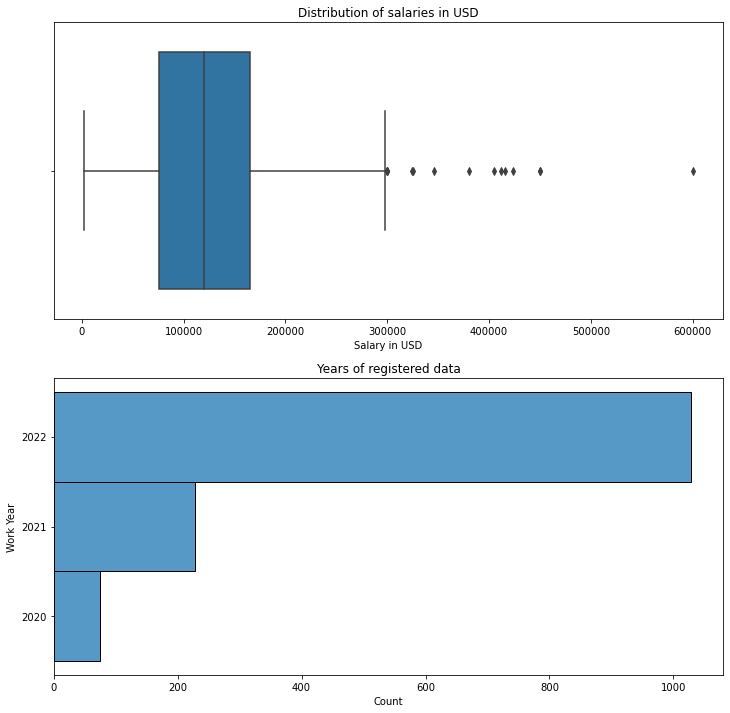

In [20]:
fig, ax = plt.subplots(2, figsize = (12,12))

sns.boxplot(data=data, x="salary_in_usd", ax = ax[0]).set(
    title = "Distribution of salaries in USD",
    xlabel = "Salary in USD"
)
sns.histplot(data=data, y="work_year_cat", ax = ax[1]).set(
    title = "Years of registered data",
    ylabel = "Work Year"
)

The same idea can be applied, but this time not using a boxplot, but a barplot using the bined salary data:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'First 95% range'),
  Text(1, 0, 'First 90% range'),
  Text(2, 0, 'First 85% range'),
  Text(3, 0, 'First 80% range'),
  Text(4, 0, 'First 75% range'),
  Text(5, 0, 'First 70% range'),
  Text(6, 0, 'First 65% range'),
  Text(7, 0, 'First 60% range'),
  Text(8, 0, 'First 55% range'),
  Text(9, 0, 'First 50% range'),
  Text(10, 0, 'First 45% range'),
  Text(11, 0, 'First 40% range'),
  Text(12, 0, 'First 35% range'),
  Text(13, 0, 'First 30% range'),
  Text(14, 0, 'First 25% range'),
  Text(15, 0, 'First 20% range'),
  Text(16, 0, 'First 15% range'),
  Text(17, 0, 'First 10% range'),
  Text(18, 0, 'First 5% range'),
  Text(19, 0, 'First 0% range')])

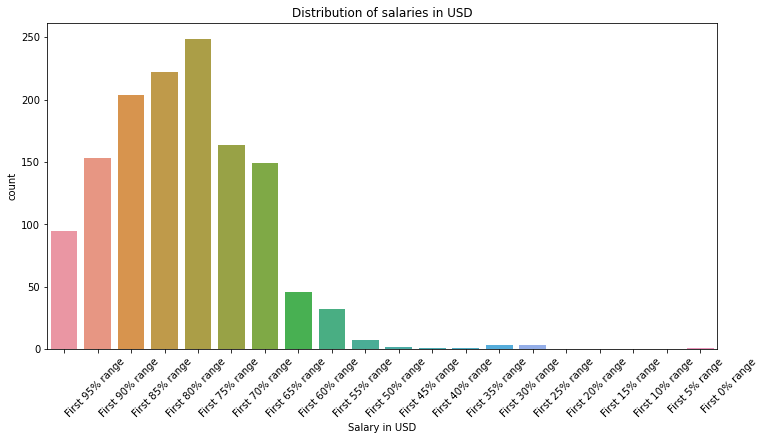

In [49]:
fig, ax = plt.subplots(figsize = (12,6))

sns.countplot(data=data, x="salary_range", ax = ax).set(
    title = "Distribution of salaries in USD",
    xlabel = "Salary in USD"
)
plt.xticks(rotation=45, ha="left")


<center>How does the median salary change from one country to another for the best paying ones ?</center>

<AxesSubplot:xlabel='employee_residence', ylabel='salary_in_usd'>

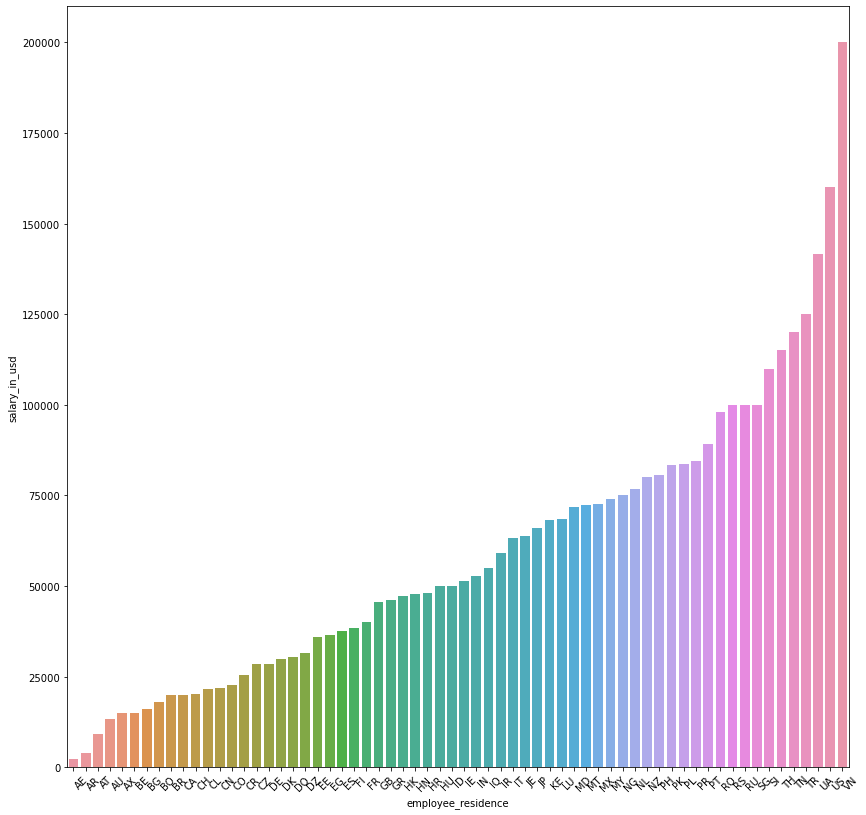

In [21]:
fig, ax = plt.subplots(figsize = (14,14))

median_sal = data.groupby("employee_residence").median()
plt.xticks(rotation=45, ha="left")
sns.barplot(data = median_sal.sort_values(by = "salary_in_usd"), x=median_sal.index, y="salary_in_usd")

<center> How did the mean salary evolve in the US year after year ?</center>

[Text(0.5, 1.0, 'Evolution of mean data jobs salary in the US from 2020 to 2022'),
 Text(0.5, 0, 'Year worked'),
 Text(0, 0.5, 'Salary in US$')]

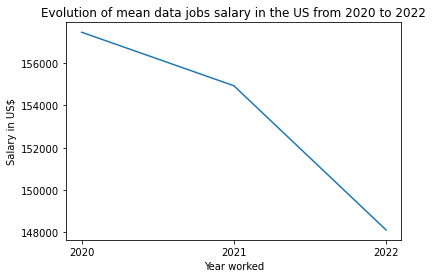

In [22]:
fig, ax = plt.subplots()

sns.lineplot(
    data = data[data.employee_residence == "US"].groupby("work_year_cat").mean(),
    x = "work_year_cat",
    y = "salary_in_usd"
).set(
    title = "Evolution of mean data jobs salary in the US from 2020 to 2022",
    xlabel = "Year worked",
    ylabel = "Salary in US$"
)



<center> Then how about the UK, India and Canada ?</center>

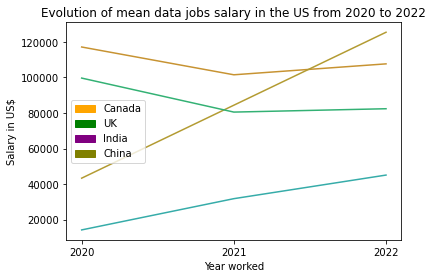

In [31]:
fig, ax = plt.subplots()
gb_india_canada = data[data.employee_residence.isin(["GB", "IN", "CA", "CN"])].groupby(["work_year_cat", "employee_residence"]).mean()

sns.lineplot(
    data = gb_india_canada,
    x = "work_year_cat",
    y = "salary_in_usd",
    hue = "employee_residence",
).set(
    title = "Evolution of mean data jobs salary in the US from 2020 to 2022",
    xlabel = "Year worked",
    ylabel = "Salary in US$"
)

# This is just to show I can make a custom legend because why not
canada = mpatches.Patch(color='orange', label='Canada')
gb = mpatches.Patch(color = 'green', label="UK")
ind = mpatches.Patch(color = 'purple', label="India")
china = mpatches.Patch(color = "olive", label="China")
plt.legend(handles=[canada, gb, ind, china])

<center>Time for some mathematics with a scatterplot</center>

<AxesSubplot:xlabel='salary_in_usd', ylabel='salary'>

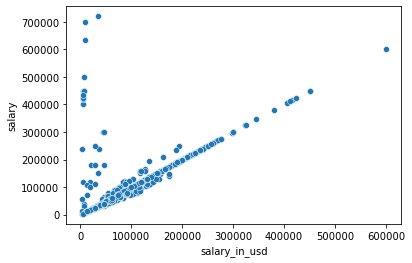

In [24]:
# Remove extreme salary outliers for visibility
data_no_extreme_sal = data[data.salary < 800000]

# I haven't colored it on purpose for my point below
sns.scatterplot(data=data_no_extreme_sal, x="salary_in_usd", y="salary")

In the above plot, it is easy to see how straight lines come out of the origin of the plot with various leading coefficients. This is because salaries augment linearly based on different conversion coefficients, here based on the US dollar whose values act as an y=x line.

We are going to confirm that each apparent line correspond to a specific currency.

Since every salary is reported in USD : $ salary = k * usdsalary, k=1 \hspace{0.15cm}for \hspace{0.15cm}USD $

With k the line coefficient for any currency, the conversion rate from USD to any other present enough on the plot currency can be found from the angle difference equation between the two lines :
$$
...
$$

Angle difference : $$ \alpha = \arctan(k) - \arctan(1) $$

Or : $$ k = \tan(\alpha + \arctan(1)) $$

Therefore we expect that **currency conversion rates determine the angle of the salary line from the origin** :



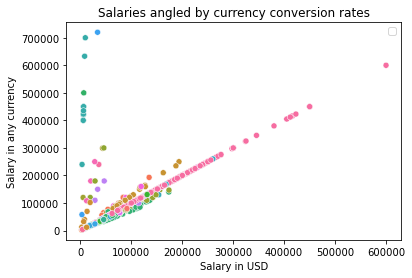

In [25]:
# Remove extreme salary outliers for visibility
data_no_extreme_sal = data[data.salary < 800000]

# I haven't colored it on purpose for my point below
sns.scatterplot(data=data_no_extreme_sal, x="salary_in_usd", y="salary", hue = "employee_residence").set(
    title = "Salaries angled by currency conversion rates",
    xlabel = "Salary in USD",
    ylabel = "Salary in any currency"
)
plt.legend(handles=[])

<center>Salary by experience in the USA</center>

Knowing how much you can expect based on your previous experious is also a plus, so how does it work in the United States ?

[Text(0.5, 1.0, 'Expected salary by experience level'),
 Text(0.5, 0, 'Experience'),
 Text(0, 0.5, 'Salary in USD')]

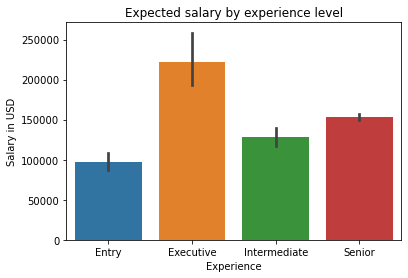

In [26]:
fig, ax = plt.subplots()

sns.barplot(data = data[data.employee_residence == "US"], x = "experience_level", y = "salary_in_usd").set(
    title = "Expected salary by experience level",
    xlabel = "Experience",
    ylabel = "Salary in USD"
)

# V - Wrap up

Here are some key takeaways from this data exploration:

As the data shows, most of the observations come from 2022. Data Science is becoming more and more popular, and thus attractive.

Therefore, on top of budget restrictions created by the pandemic, salaries in data science tend to get lower because of the now higher demand of employment for lower offer in western countries. However, the trend is the opposite in countries dominated by lower and middle class populations like China and India, and salaries skyrocket to attract technical talent from these places.

Naturally, salaries increases with responsabilities by experience, but even baseline entry-level salaries are attractive, with the mean standing around 100k$ per year for entry level jobs. Data Science still being a relatively new trend based on when it started to become popular, the 150k$ per year senior level salaries are reachable with time and effort.

<h1><center> What to do with more time ? </center><h1>

With more time, these would be the questions to explore:

* How to build an accurate model to estimate salaries based on the predictor variables in the dataset ? I would want to know how much I can ask for when negociating a deal based on my previous experiences and the company in question.
* Understand how company size affects experience level in employees as well as salaries. I only worked internships in startups, and I would be curious to know where I should apply to in order to work with very experienced people.
* Which countries prefer in-office and remote work in data science. I personally need to physically go to work to dissociate my personal space from my work space, thus working in a country where that is the norm would be pleasant.
